## Análisis Exploratorio

In [452]:
import pandas as pd, matplotlib.pyplot as plt, contextily as ctx, geopandas as gpd, numpy as np, seaborn as sns

In [454]:
#Exploramos la base de datos
df = gpd.read_file("C:\\Users\\palom\\Downloads\\Rosario F.xlsx")

In [456]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 372 filas y 8 columnas


In [457]:
df.head(5)

,interview__key,METODO,Coord1__Latitude,Coord1__Longitude,EDAD,GENERO,INT DE VOTO X ESPACIO,RADIO
0,56-56-25-81,F2F,-32.881458,-60.695274,56 y mas,Masculino,LIBERTARIOS,820840409
1,67-96-98-06,F2F,-32.882259,-60.693571,36 a 45,Masculino,OTROS,820840410
2,24-21-01-39,F2F,-32.884731,-60.692882,56 y mas,Femenino,OTROS,820840502
3,84-96-80-81,F2F,-32.884673,-60.693464,26 a 35,Masculino,LIBERTARIOS,820840502
4,21-29-79-64,F2F,-32.918833,-60.703628,36 a 45,Femenino,NINGUNO/NOSABE,820841013


In [459]:
df.isna().sum() #Valores nulos

interview__key           0
METODO                   0
Coord1__Latitude         0
Coord1__Longitude        0
EDAD                     0
GENERO                   0
INT DE VOTO X ESPACIO    0
RADIO                    0
dtype: int64

In [461]:
df.dtypes 

interview__key            object
METODO                    object
Coord1__Latitude         float64
Coord1__Longitude        float64
EDAD                      object
GENERO                    object
INT DE VOTO X ESPACIO     object
RADIO                     object
dtype: object

In [463]:
paleta = {
    "FIT": "red",             
    "FdT": "lightblue",       
    "JxC": "yellow",          
    "LIBERTARIOS": "purple",  
    "NINGUNO/NOSABE": "darkgray",  
    "OTROS": "lightgray",     
    "PNK": "darkblue"         
}

In [465]:
#Distribución de frecuencia absoluta de intención de votos por espacio
int_voto = df['INT DE VOTO X ESPACIO'].value_counts() 
print(int_voto) 
#También nos sirve para ver si hay datos perdidos (no hay)

INT DE VOTO X ESPACIO
JxC               90
FdT               80
NINGUNO/NOSABE    72
LIBERTARIOS       57
OTROS             35
PNK               26
FIT               12
Name: count, dtype: int64


In [467]:
#Distribución de frecuencia relativa porcentual de intención de voto por espacio
int_voto_porcentaje = df['INT DE VOTO X ESPACIO'].value_counts(normalize=True) * 100 #Multiplicamos por 100 porque si no solo muestra la frecuencia relativa
print(int_voto_porcentaje) 

INT DE VOTO X ESPACIO
JxC               24.193548
FdT               21.505376
NINGUNO/NOSABE    19.354839
LIBERTARIOS       15.322581
OTROS              9.408602
PNK                6.989247
FIT                3.225806
Name: proportion, dtype: float64


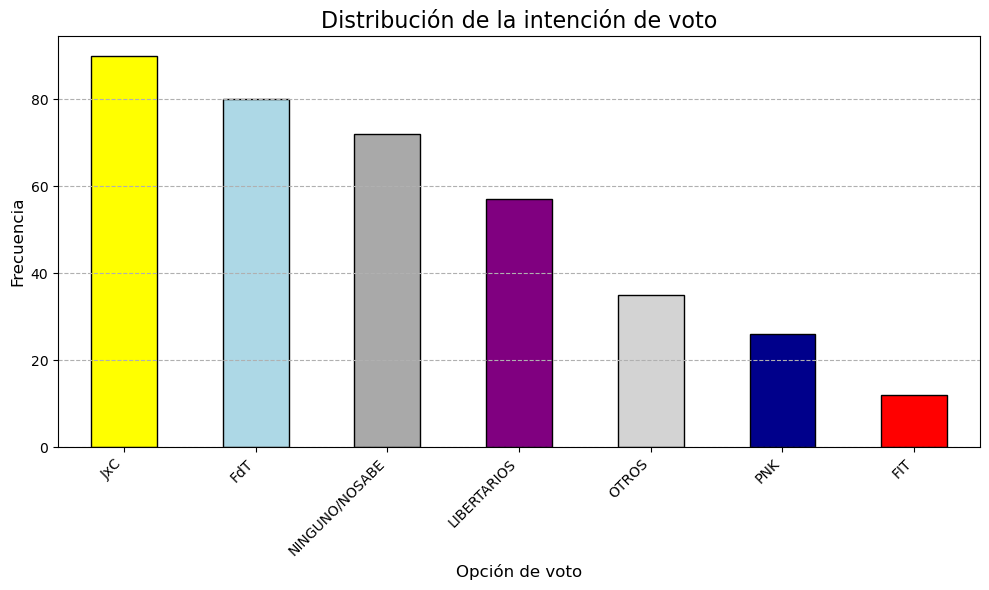

In [469]:
#Gráfico de barras
plt.figure(figsize=(10, 6))
int_voto.plot(kind='bar', color=[paleta.get(x, 'gray') for x in int_voto.index], edgecolor='black')
plt.title('Distribución de la intención de voto', fontsize=16)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlabel('Opción de voto', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

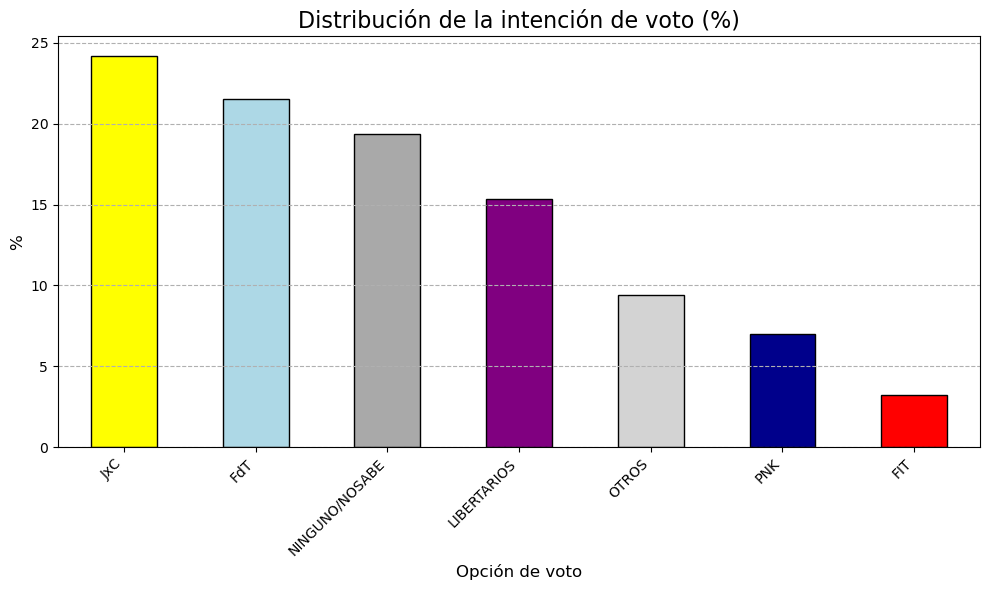

In [471]:
#Gráfico de barras porcentual
plt.figure(figsize=(10, 6))
int_voto_porcentaje.plot(kind='bar', color=[paleta.get(x, 'gray') for x in int_voto_porcentaje.index], edgecolor='black')
plt.title('Distribución de la intención de voto (%)', fontsize=16)
plt.ylabel('%', fontsize=12)
plt.xlabel('Opción de voto', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


In [472]:
#Distribución de intención de voto según género
voto_genero = pd.crosstab(df['INT DE VOTO X ESPACIO'], df['GENERO']) 
print(voto_genero)

GENERO                 Femenino  Masculino  Otro
INT DE VOTO X ESPACIO                           
FIT                           5          5     2
FdT                          35         45     0
JxC                          42         48     0
LIBERTARIOS                  11         44     2
NINGUNO/NOSABE               40         28     4
OTROS                        19         15     1
PNK                          13         13     0


In [473]:
#Distribución de intención de voto según género (% al interior de cada espacio)
voto_genero_porcentaje = pd.crosstab(df['INT DE VOTO X ESPACIO'], df['GENERO'], normalize='index')*100
print(voto_genero_porcentaje)

GENERO                  Femenino  Masculino       Otro
INT DE VOTO X ESPACIO                                 
FIT                    41.666667  41.666667  16.666667
FdT                    43.750000  56.250000   0.000000
JxC                    46.666667  53.333333   0.000000
LIBERTARIOS            19.298246  77.192982   3.508772
NINGUNO/NOSABE         55.555556  38.888889   5.555556
OTROS                  54.285714  42.857143   2.857143
PNK                    50.000000  50.000000   0.000000


<Figure size 1000x600 with 0 Axes>

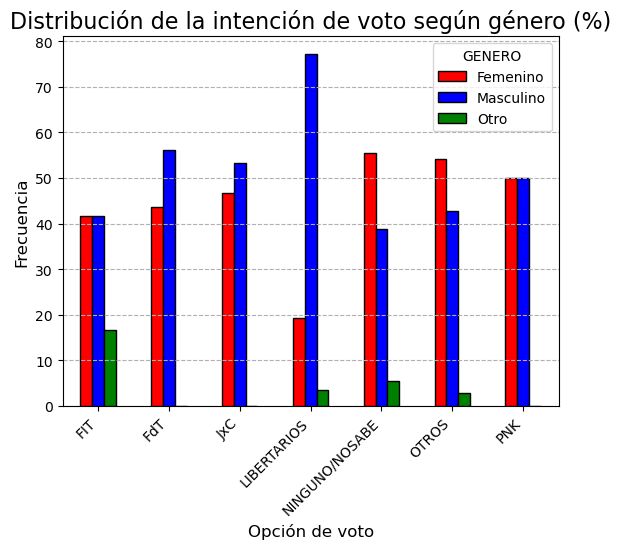

In [474]:
#Gráfico de barras porcentual para género
plt.figure(figsize=(10, 6))
voto_genero_porcentaje.plot(kind='bar', color=('red', 'blue', 'green'), edgecolor='black')
plt.title('Distribución de la intención de voto según género (%)', fontsize=16)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlabel('Opción de voto', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

In [476]:
import scipy.stats as st

#Chi Cuadrado entre Intención de voto por espacio y Género
chi_genero = pd.crosstab(df['INT DE VOTO X ESPACIO'], df['GENERO'])
chi2, p, dof, expected = st.chi2_contingency(chi_genero)

print(f"Chi-cuadrado: {chi2}, p-valor: {p}")

Chi-cuadrado: 39.377584997848146, p-valor: 9.11709745688659e-05


### Hipótesis: ser del género masculino incide positivamente en la intención de voto a La Libertad Avanza.

In [651]:
#Regresión logísitca
import statsmodels.api as sm

# Generar dummies para la columna 'INT DE VOTO X ESPACIO' y 'GENERO'
df_dummies_voto = pd.get_dummies(df_est['INT DE VOTO X ESPACIO'], prefix='VOTO', drop_first=True)
df_dummies_genero = pd.get_dummies(df_est['GENERO'], prefix='GENERO', drop_first=False)

# Agregar las columnas dummies al DataFrame original
df_est_dummies = pd.concat([df_dummies_genero, df_dummies_voto], axis=1)

# Ver el DataFrame con las columnas dummies agregadas
print(df_est_dummies.columns)

Index(['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro', 'VOTO_FdT',
       'VOTO_JxC', 'VOTO_LIBERTARIOS', 'VOTO_NINGUNO/NOSABE', 'VOTO_OTROS',
       'VOTO_PNK'],
      dtype='object')


In [653]:
# Aseguramos que las columnas sean numéricas
df_est_dummies['VOTO_LIBERTARIOS'] = df_est_dummies['VOTO_LIBERTARIOS'].astype(bool)
df_est_dummies['GENERO_Masculino'] = df_est_dummies['GENERO_Masculino'].astype(bool)

df_est_dummies.head()

,GENERO_Femenino,GENERO_Masculino,GENERO_Otro,VOTO_FdT,VOTO_JxC,VOTO_LIBERTARIOS,VOTO_NINGUNO/NOSABE,VOTO_OTROS,VOTO_PNK
0,False,True,False,False,False,True,False,False,False
1,False,True,False,False,False,False,False,True,False
2,True,False,False,False,False,False,False,True,False
3,False,True,False,False,False,True,False,False,False
4,True,False,False,False,False,False,True,False,False


In [657]:
x = df_est_dummies['GENERO_Masculino']
y = df_est_dummies['VOTO_LIBERTARIOS']

# Elimina las filas con valores faltantes en X o y
df_est_dummies = df_est_dummies.dropna(subset=['GENERO_Masculino', 'VOTO_LIBERTARIOS'])
print(df_est_dummies[['GENERO_Masculino', 'VOTO_LIBERTARIOS']].isnull().sum())

# Agrega una constante a X (necesario para el modelo logístico)
x = sm.add_constant(x)
x['GENERO_Masculino'] = pd.to_numeric(x['GENERO_Masculino'])

df_est_dummies['GENERO_Masculino'] = df_est_dummies['GENERO_Masculino'].astype(int)

# Ajusta el modelo de regresión logística
model = sm.Logit(y, x)
result = model.fit()

# Imprime el resumen del modelo
print(result.summary())

GENERO_Masculino    0
VOTO_LIBERTARIOS    0
dtype: int64
Optimization terminated successfully.
         Current function value: 0.389221
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       VOTO_LIBERTARIOS   No. Observations:                  308
Model:                          Logit   Df Residuals:                      306
Method:                           MLE   Df Model:                            1
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:                 0.07676
Time:                        15:49:40   Log-Likelihood:                -119.88
converged:                       True   LL-Null:                       -129.85
Covariance Type:            nonrobust   LLR p-value:                 8.017e-06
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.8258      0.364 

### Resultados:

- Pseudo R2: indica que el 16,6% de la variación de la variable dependiente (Intención de voto a LLA) se explica por la variable independiente (Genero masculino). Si bien hay una relación, existen otros factores que influyen en la VD.
- Coeficiente de Género masculino: indica que por cada unidad que aumenta, la Intención de voto a LLA **aumenta** 0,0044. Esto sugiere que el género masculino está asociado con una mayor intención de voto a LLA.
- Constante de Género masculino: cuando este es 0, la Intención de voto a LLA es -2,8258.
- Siginificatividad de Género masculino: 0. Al ser menor a 0.05, indica que la relación es estadísticamente significativa. Por lo que se puede decir que existe una alta probabilidad de que el efecto de la VI sobre la VD sea real y no se deba al azar, rechazando la hipótesis nula de que las variables no tienen relación.

In [659]:
#Distribución de intención de voto según grupo etario
voto_edad = pd.crosstab(df['INT DE VOTO X ESPACIO'], df['EDAD']) 
print(voto_edad)

EDAD                   16 a 25  26 a 35  36 a 45  46 a 55  56 y mas
INT DE VOTO X ESPACIO                                              
FIT                          1        5        4        1         1
FdT                          7       13       23       13        24
JxC                          7        9       22       20        32
LIBERTARIOS                  7       12       16       10        12
NINGUNO/NOSABE               6       11       16       19        20
OTROS                        0        5        8       17         5
PNK                          0        6       10        3         7


In [661]:
#Distribución de intención de voto según grupo etario (% al interior de cada espacio)
voto_edad_porcentaje = pd.crosstab(df['INT DE VOTO X ESPACIO'], df['EDAD'], normalize='index')*100
print(voto_edad_porcentaje)

EDAD                     16 a 25    26 a 35    36 a 45    46 a 55   56 y mas
INT DE VOTO X ESPACIO                                                       
FIT                     8.333333  41.666667  33.333333   8.333333   8.333333
FdT                     8.750000  16.250000  28.750000  16.250000  30.000000
JxC                     7.777778  10.000000  24.444444  22.222222  35.555556
LIBERTARIOS            12.280702  21.052632  28.070175  17.543860  21.052632
NINGUNO/NOSABE          8.333333  15.277778  22.222222  26.388889  27.777778
OTROS                   0.000000  14.285714  22.857143  48.571429  14.285714
PNK                     0.000000  23.076923  38.461538  11.538462  26.923077


<Figure size 1000x600 with 0 Axes>

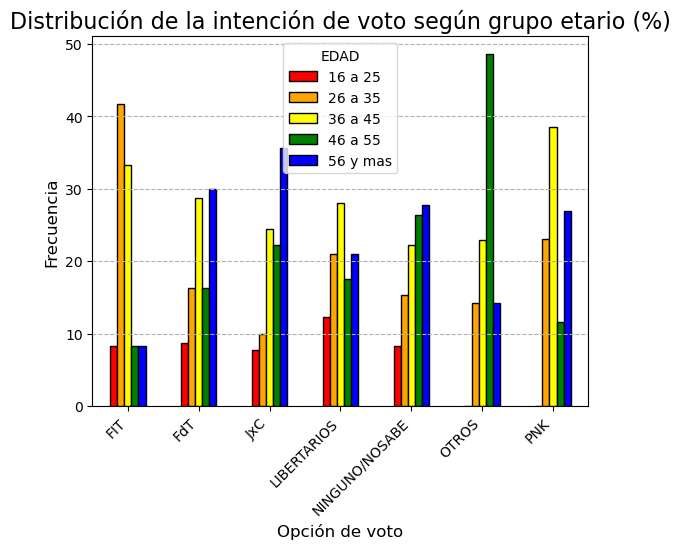

In [663]:
#Gráfico de barras porcentual para grupo etario
plt.figure(figsize=(10, 6))
voto_edad_porcentaje.plot(kind='bar', color=("red", "orange", "yellow", "green", "blue", "purple"), edgecolor='black')
plt.title('Distribución de la intención de voto según grupo etario (%)', fontsize=16)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlabel('Opción de voto', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

In [665]:
#Chi Cuadrado entre Intención de voto por espacio y Edad
chi_edad = pd.crosstab(df['INT DE VOTO X ESPACIO'], df['EDAD'])
chi2, p, dof, expected = st.chi2_contingency(chi_edad)

print(f"Chi-cuadrado: {chi2}, p-valor: {p}")

Chi-cuadrado: 40.42369073238307, p-valor: 0.019250431661207743


### Hipótesis: ser menor de 26 años incide positivamente en la intención de voto a La Libertad Avanza.¶

In [668]:
#Regresión logísitca

# Generar dummies para la columna 'INT DE VOTO X ESPACIO' y 'GENERO'
df_dummies_voto = pd.get_dummies(df_est['INT DE VOTO X ESPACIO'], prefix='VOTO', drop_first=True)
df_dummies_edad = pd.get_dummies(df_est['EDAD'], prefix='EDAD', drop_first=False)

# Agregar las columnas dummies al DataFrame original
df_est_dummies = pd.concat([df_dummies_edad, df_dummies_voto, df], axis=1)

# Ver el DataFrame con las columnas dummies agregadas
print(df_est_dummies.columns)

Index(['EDAD_16 a 25', 'EDAD_26 a 35', 'EDAD_36 a 45', 'EDAD_46 a 55',
       'EDAD_56 y mas', 'VOTO_FdT', 'VOTO_JxC', 'VOTO_LIBERTARIOS',
       'VOTO_NINGUNO/NOSABE', 'VOTO_OTROS', 'VOTO_PNK', 'interview__key',
       'METODO', 'Coord1__Latitude', 'Coord1__Longitude', 'EDAD', 'GENERO',
       'INT DE VOTO X ESPACIO', 'RADIO'],
      dtype='object')


In [674]:
# Aseguramos que las columnas sean numéricas
df_est_dummies['VOTO_LIBERTARIOS'] = df_est_dummies['VOTO_LIBERTARIOS'].astype(int)
df_est_dummies['EDAD_16 a 25'] = df_est_dummies['EDAD_16 a 25'].astype(bool)

df_est_dummies.head()

,EDAD_16 a 25,EDAD_26 a 35,EDAD_36 a 45,EDAD_46 a 55,EDAD_56 y mas,VOTO_FdT,VOTO_JxC,VOTO_LIBERTARIOS,VOTO_NINGUNO/NOSABE,VOTO_OTROS,VOTO_PNK,interview__key,METODO,Coord1__Latitude,Coord1__Longitude,EDAD,GENERO,INT DE VOTO X ESPACIO,RADIO
0,False,False,False,False,True,False,False,1,False,False,False,56-56-25-81,F2F,-32.881458,-60.695274,56 y mas,Masculino,LIBERTARIOS,820840409
1,False,False,True,False,False,False,False,0,False,True,False,67-96-98-06,F2F,-32.882259,-60.693571,36 a 45,Masculino,OTROS,820840410
2,False,False,False,False,True,False,False,0,False,True,False,24-21-01-39,F2F,-32.884731,-60.692882,56 y mas,Femenino,OTROS,820840502
3,False,True,False,False,False,False,False,1,False,False,False,84-96-80-81,F2F,-32.884673,-60.693464,26 a 35,Masculino,LIBERTARIOS,820840502
4,False,False,True,False,False,False,False,0,True,False,False,21-29-79-64,F2F,-32.918833,-60.703628,36 a 45,Femenino,NINGUNO/NOSABE,820841013


In [678]:
x = df_est_dummies['EDAD_16 a 25']
y = df_est_dummies['VOTO_LIBERTARIOS']

# Elimina las filas con valores faltantes en X o y
df_est_dummies = df_est_dummies.dropna(subset=['EDAD_16 a 25', 'VOTO_LIBERTARIOS'])

# Agrega una constante a X (necesario para el modelo logístico)
x = sm.add_constant(x)
x['EDAD_16 a 25'] = pd.to_numeric(x['EDAD_16 a 25'])

df_est_dummies['EDAD_16 a 25'] = df_est_dummies['EDAD_16 a 25'].astype(int)

# Ajusta el modelo de regresión logística
model = sm.Logit(y, x)
result = model.fit()

# Imprime el resumen del modelo
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.416443
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       VOTO_LIBERTARIOS   No. Observations:                  308
Model:                          Logit   Df Residuals:                      306
Method:                           MLE   Df Model:                            1
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:                 0.01219
Time:                        15:50:24   Log-Likelihood:                -128.26
converged:                       True   LL-Null:                       -129.85
Covariance Type:            nonrobust   LLR p-value:                   0.07523
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.8245      0.170    -10.708      0.000      -2.159      -1.491
EDAD_16 a 25     0.9773

### Resultados:

- Pseudo R2: indica que el 1,2% de la variación de la variable dependiente (Intención de voto a LLA) se explica por la variable independiente (Edad de 16 a 25). La relación es muy débil, lo que indica que existen otros factores que influyen en la VD.
- Coeficiente de Edad de 16 a 25: indica que por cada unidad que aumenta, la Intención de voto a LLA **aumenta** 0,9773. Esto sugiere que el género masculino está asociado con una mayor intención de voto a LLA.
- Constante de Edad de 16 a 25: cuando este es 0, la Intención de voto a LLA es -1,8245.
- Siginificatividad de Edad de 16 a 25: 0,059. Al ser levemente mayor a 0.05, indica que la relación no es estadísticamente significativa. No hay evidencia suficiente para rechazar la hipótesis nula, lo que sugiere que el modelo no tiene un buen poder explicativo para predecir el voto a LLA y se deba al azar.

## Análisis Espacial

In [680]:
import folium
from folium.plugins import HeatMap

In [682]:
#Mapeo de densidad de entrevistados
df = df.dropna(subset=['Coord1__Latitude', 'Coord1__Longitude']) #Elimina valores Nan.

#Creamos el mapa:
mapa = folium.Map(location=[-32.9468, -60.6393], zoom_start=12) #Centramos el mapa en Rosario según sus coordenadas
coordenadas = df[['Coord1__Latitude', 'Coord1__Longitude']].values.tolist() #Crea una lista de coordenadas que contiene latitud y longitud
HeatMap(coordenadas).add_to(mapa) #Especificamos el tipo de mapa
mapa.save("C:\\Users\\palom\\Downloads\\mapa_densidad_rosario.html") #Guardamos el mapa como archivo HTML
print("Mapa de densidad creado. Ábrelo con un navegador.")

Mapa de densidad creado. Ábrelo con un navegador.


In [684]:
#Mapeo de densidad según intención de voto por espacio
mapa = folium.Map(location=[-32.9468, -60.6393], zoom_start=12)
categorias = df['INT DE VOTO X ESPACIO'].unique()

#Creamos una capa por categoría:
for categoria in categorias:
    mapa_espacios = df[df['INT DE VOTO X ESPACIO'] == categoria]
    coordenadas = mapa_espacios[['Coord1__Latitude', 'Coord1__Longitude']].values.tolist()
    capa = folium.FeatureGroup(name=f"Intención de voto: {categoria}")
    HeatMap(coordenadas).add_to(capa)
    capa.add_to(mapa)

# Agregamos un control de capas
folium.LayerControl().add_to(mapa)

# Guardamos el mapa como archivo HTML
mapa.save("C:\\Users\\palom\\Downloads\\mapa_densidad_espacios.html")

print("Mapa de densidad con filtros creado. Ábrelo con un navegador.")

Mapa de densidad con filtros creado. Ábrelo con un navegador.


In [686]:
# Crear geometria del GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(x=df.Coord1__Longitude, y=df.Coord1__Latitude))
gdf = gpd.GeoDataFrame(df, geometry=gdf['geometry'])
gdf.head()

,interview__key,METODO,Coord1__Latitude,Coord1__Longitude,EDAD,GENERO,INT DE VOTO X ESPACIO,RADIO,geometry
0,56-56-25-81,F2F,-32.881458,-60.695274,56 y mas,Masculino,LIBERTARIOS,820840409,POINT (-60.69527 -32.88146)
1,67-96-98-06,F2F,-32.882259,-60.693571,36 a 45,Masculino,OTROS,820840410,POINT (-60.69357 -32.88226)
2,24-21-01-39,F2F,-32.884731,-60.692882,56 y mas,Femenino,OTROS,820840502,POINT (-60.69288 -32.88473)
3,84-96-80-81,F2F,-32.884673,-60.693464,26 a 35,Masculino,LIBERTARIOS,820840502,POINT (-60.69346 -32.88467)
4,21-29-79-64,F2F,-32.918833,-60.703628,36 a 45,Femenino,NINGUNO/NOSABE,820841013,POINT (-60.70363 -32.91883)


In [688]:
#Establecer sistema de coordenadas Ellipsodial (4326)
gdf.set_crs(epsg=4326, inplace=True)
print(gdf.crs)

EPSG:4326


In [690]:
#límites al polígono de rosario
rosario  = {
    "minx": -60.74,
    "maxx": -60.58,
    "miny": -33,
    "maxy": -32.88
}
gdf = gdf.cx[rosario["minx"]:rosario["maxx"], rosario["miny"]:rosario["maxy"]]

In [692]:
# Leer y filtrar los GeoDataFrames
radios = gpd.read_file("C:\\Users\\palom\\Downloads\\radios_censales_santafe.shp")
radios = radios.cx[rosario["minx"]:rosario["maxx"], rosario["miny"]:rosario["maxy"]]
radios = gpd.GeoDataFrame(radios, geometry=radios.geometry)

barrios = gpd.read_file("C:\\Users\\palom\\Downloads\\barrios.gml")
barrios = barrios.cx[rosario["minx"]:rosario["maxx"], rosario["miny"]:rosario["maxy"]]
barrios = gpd.GeoDataFrame(barrios, geometry=barrios.geometry)

In [694]:
radios.set_crs(epsg=4326, inplace=True)
barrios.set_crs(epsg=4326, inplace=True)
print("")

In [696]:
#Spatial Join
df_rad = gpd.sjoin(gdf, radios, how="inner", predicate="within")
df_bar = gpd.sjoin(gdf, barrios, how="left", predicate="within")


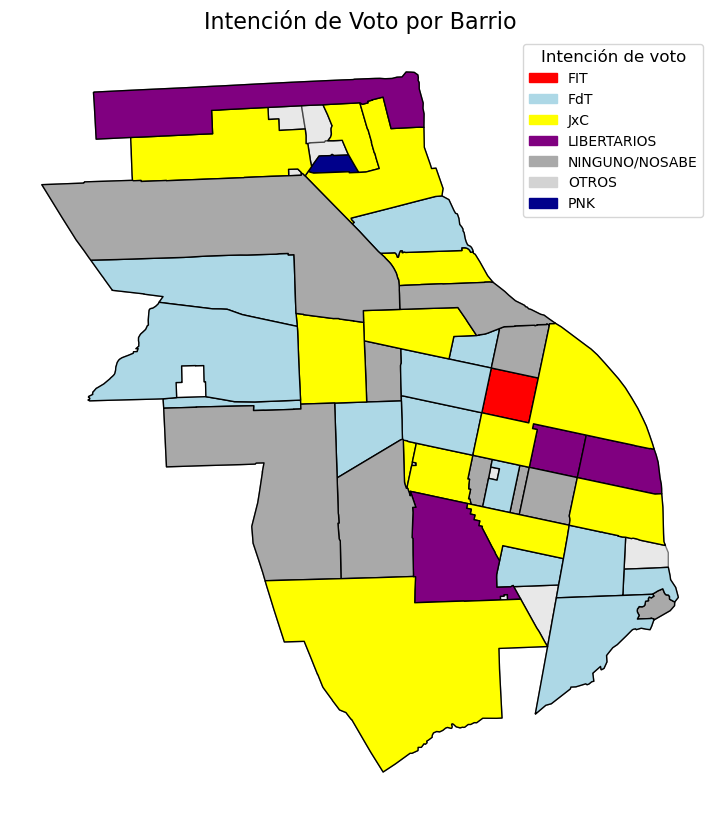

In [698]:
moda_vot = (
    df_bar.groupby(['BARRIO', 'INT DE VOTO X ESPACIO'])
    .size()
    .reset_index(name='conteo')
)

# Seleccionar la intención de voto con mayor cantidad por barrio
moda_vot = moda_vot.loc[
    moda_vot.groupby('BARRIO')['conteo'].idxmax()
]

barrios_2 = barrios.merge(moda_vot, on="BARRIO", how="inner")
barrios_2['color'] = barrios_2['INT DE VOTO X ESPACIO'].map(paleta).fillna('black')


# Graficar los datos de df_rad utilizando la paleta
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el polígono de Rosario
barrios.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)  # Polígono de Rosario
barrios_2.plot(ax=ax, color=barrios_2['color'], edgecolor='black')

import matplotlib.patches as mpatches
# Crear los elementos de la leyenda basados en la paleta
leyenda = [
    mpatches.Patch(color=color, label=partido) for partido, color in paleta.items()
]

# Añadir la leyenda al gráfico
ax.legend(handles=leyenda, title="Intención de voto", loc='upper right', fontsize=10, title_fontsize=12)

# Personalización del gráfico
ax.set_title('Intención de Voto por Barrio', fontsize=16)
ax.axis('off')
plt.show()


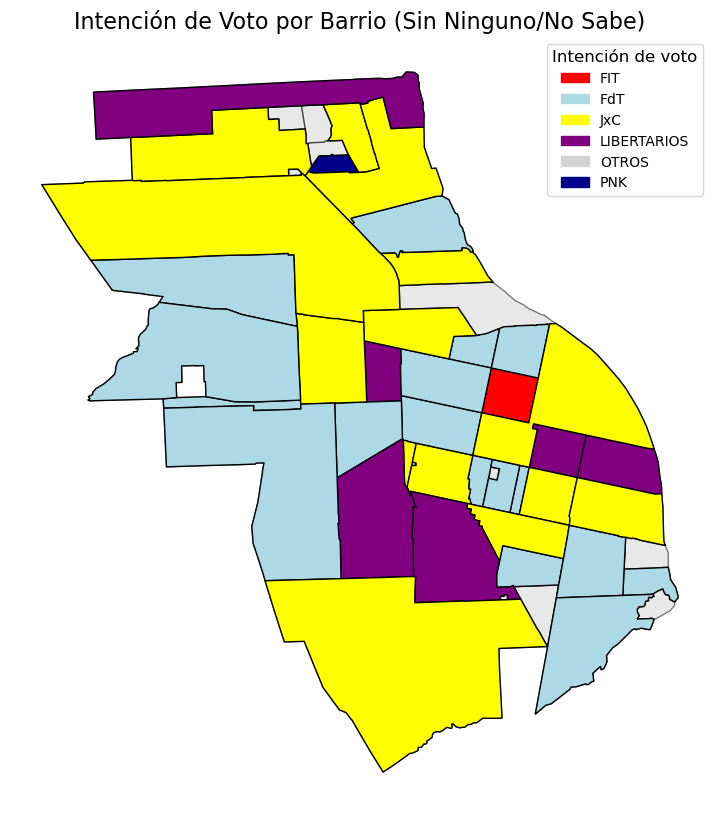

In [750]:
paleta_2= {
    "FIT": "red",             
    "FdT": "lightblue",       
    "JxC": "yellow",          
    "LIBERTARIOS": "purple",    
    "OTROS": "lightgray",     
    "PNK": "darkblue"         
}
df_bar_vot = df_bar[df_bar['INT DE VOTO X ESPACIO'] != "NINGUNO/NOSABE"]
moda_vot = (
    df_bar_vot.groupby(['BARRIO', 'INT DE VOTO X ESPACIO'])
    .size()
    .reset_index(name='conteo')
)

# Seleccionar la intención de voto con mayor cantidad por barrio
moda_vot = moda_vot.loc[
    moda_vot.groupby('BARRIO')['conteo'].idxmax()
]

barrios_3 = barrios.merge(moda_vot, on="BARRIO", how="inner")
barrios_3['color'] = barrios_3['INT DE VOTO X ESPACIO'].map(paleta).fillna('black')



fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el polígono de Rosario
barrios.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)  # Polígono de Rosario
barrios_3.plot(ax=ax, color=barrios_3['color'], edgecolor='black')

import matplotlib.patches as mpatches
# Crear los elementos de la leyenda basados en la paleta
leyenda = [
    mpatches.Patch(color=color, label=partido) for partido, color in paleta_2.items()
]

# Añadir la leyenda al gráfico
ax.legend(handles=leyenda, title="Intención de voto", loc='upper right', fontsize=10, title_fontsize=12)

# Personalización del gráfico
ax.set_title('Intención de Voto por Barrio (Sin Ninguno/No Sabe)', fontsize=16)
ax.axis('off')
plt.show()

## Hipótesis: Se puede estimar la intencion de voto en el Departamento de Rosario en función de las siguientes variables:
* ### Variables Socioeconómicas: Indice de Marginalidad, Nivel Educativo y Segmento Socioeconómico
* ### Variables Políticas: Resultados de Elecciones Generales 2019

In [942]:
censales = gpd.read_file("C:\\Users\\palom\\Downloads\\Radios_Censales.csv")
#censales.columns

In [943]:
# Eliminar filas con valores nulos en las columnas específicas
censales = censales.dropna(subset=["Segmento socioeconÃ³mico del radio"])
censales = censales.dropna(subset=['GeometrÃ­a en GeoJSON'])

In [945]:
# Convertir el DataFrame a un GeoDataFrame, estableciendo la columna de geometría
from shapely.geometry import shape
import json
censales['GeometrÃ­a en GeoJSON'] = censales['GeometrÃ­a en GeoJSON'].apply(lambda x: shape(json.loads(x)))
censales = gpd.GeoDataFrame(censales, geometry='GeometrÃ­a en GeoJSON')
print(type(censales))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [948]:
censales.set_crs(epsg=4326, inplace=True)
print(gdf.crs)

EPSG:4326


In [950]:
df_est = gpd.sjoin(gdf, censales, how="inner", predicate="within")
col = [
    'EDAD', 'GENERO', 'INT DE VOTO X ESPACIO', 'RADIO', 'geometry', 
    'PoblaciÃ³n de 18 y mÃ¡s hasta primaria', 'PoblaciÃ³n de 18 y mÃ¡s con primaria y secundario completo',
    'PoblaciÃ³n de 18 y mÃ¡s con secundario completo o terciario sin universitario completo',
    'PoblaciÃ³n con universitario completo o mÃ¡s', 'Hogares con hacinamiento (>= 3 personas por cuarto)',
    'Hogares sin caÃ±erÃ­a de agua en la vivienda', 'Hogares sin cloaca / red pÃºblica',
    'Hogares con calidad de la vivienda insuficiente', 'Hogares con calidad de la vivienda precaria',
    'Segmento socioeconÃ³mico del radio', 'CÃ³digo de provincia', 'Nombre de provincia',
    'CÃ³digo de departamentos/comuna', 'Nombre de departamentos/comuna', 'CÃ³digo de radio', 
    'PoblaciÃ³n total', 'Total de hogares', 'Latitud del centroide', 'Longitud del centroide',
    'Superficie en km2', 'Hogares total con marginalidad'
]

# Seleccionar solo las columnas deseadas
df_est = df_est[col]

### 1. Indice de Marginalidad

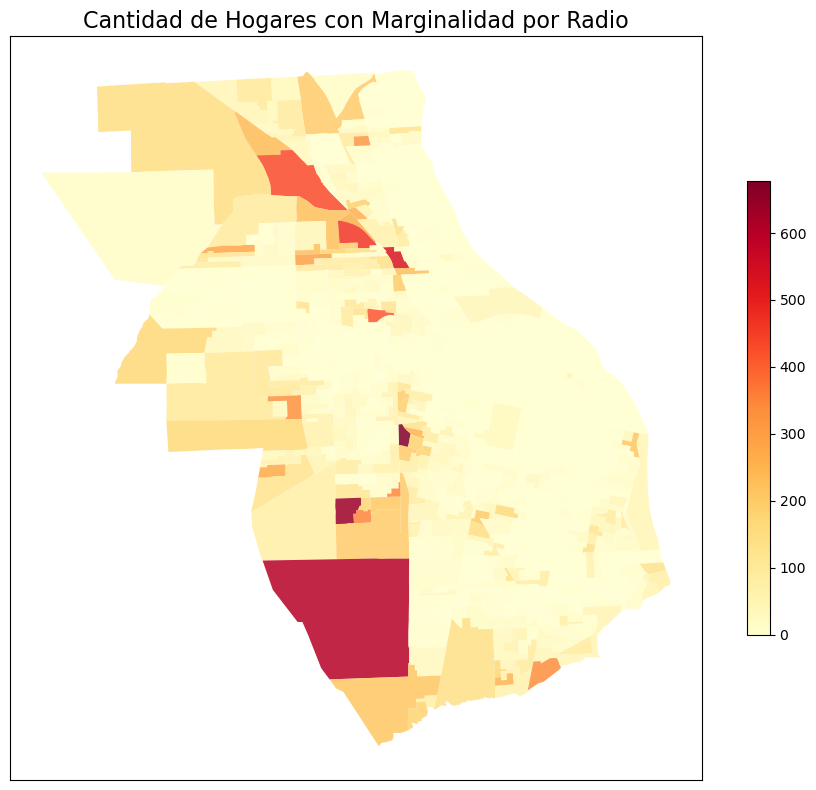

In [953]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Asegurarse de que la columna 'Hogares total con marginalidad' sea numérica
censales['Hogares total con marginalidad'] = pd.to_numeric(censales['Hogares total con marginalidad'], errors='coerce')

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar los datos con la paleta 'YlOrRd' (de amarillo oscuro a rojo/marrón)
censales.plot(
    column="Hogares total con marginalidad", 
    ax=ax, 
    legend=False,  # Desactivar la leyenda predeterminada
    cmap='YlOrRd',  # Usamos la paleta 'YlOrRd' para colores de amarillo a rojo/marrón
    alpha=0.85  # Transparencia para las áreas  
)

# Ajustar la leyenda
norm = Normalize(vmin=censales['Hogares total con marginalidad'].min(), vmax=censales['Hogares total con marginalidad'].max())  # Normalización según los valores
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=norm)
sm.set_array([])

# Añadir la barra de colores (leyenda) en el gráfico
fig.colorbar(sm, ax=ax, fraction=0.02, pad=0.04)

# Eliminar escritura en ejes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

# Título
ax.set_title('Cantidad de Hogares con Marginalidad por Radio', fontsize=16)

# Mostrar gráfico
plt.tight_layout()
plt.show()

### Regresión 

In [956]:
# Ver el DataFrame con las columnas dummies agregadas
df_est_dummies = pd.get_dummies(df_est['INT DE VOTO X ESPACIO'], prefix='VOTO', drop_first=True)

# Agregar las columnas dummies al DataFrame original
df_est_dummies = pd.concat([df_est, df_est_dummies], axis=1)

# Ver el DataFrame con las columnas dummies agregadas
print(df_est_dummies.columns)

Index(['EDAD', 'GENERO', 'INT DE VOTO X ESPACIO', 'RADIO', 'geometry',
       'PoblaciÃ³n de 18 y mÃ¡s hasta primaria',
       'PoblaciÃ³n de 18 y mÃ¡s con primaria y secundario completo',
       'PoblaciÃ³n de 18 y mÃ¡s con secundario completo o terciario sin universitario completo',
       'PoblaciÃ³n con universitario completo o mÃ¡s',
       'Hogares con hacinamiento (>= 3 personas por cuarto)',
       'Hogares sin caÃ±erÃ­a de agua en la vivienda',
       'Hogares sin cloaca / red pÃºblica',
       'Hogares con calidad de la vivienda insuficiente',
       'Hogares con calidad de la vivienda precaria',
       'Segmento socioeconÃ³mico del radio', 'CÃ³digo de provincia',
       'Nombre de provincia', 'CÃ³digo de departamentos/comuna',
       'Nombre de departamentos/comuna', 'CÃ³digo de radio',
       'CÃ³digo de radio', 'PoblaciÃ³n total', 'Total de hogares',
       'Latitud del centroide', 'Longitud del centroide', 'Superficie en km2',
       'Superficie en km2', 'Hogares total co

In [976]:
df_est_dummies.head()

,EDAD,GENERO,INT DE VOTO X ESPACIO,RADIO,geometry,PoblaciÃ³n de 18 y mÃ¡s hasta primaria,PoblaciÃ³n de 18 y mÃ¡s con primaria y secundario completo,PoblaciÃ³n de 18 y mÃ¡s con secundario completo o terciario sin universitario completo,PoblaciÃ³n con universitario completo o mÃ¡s,Hogares con hacinamiento (>= 3 personas por cuarto),...,Longitud del centroide,Superficie en km2,Superficie en km2,Hogares total con marginalidad,VOTO_FdT,VOTO_JxC,VOTO_LIBERTARIOS,VOTO_NINGUNO/NOSABE,VOTO_OTROS,VOTO_PNK
0,56 y mas,Masculino,LIBERTARIOS,820840409,POINT (-60.69527 -32.88146),118,248,330,91,0,...,-60.689258,0.2811027023708,0.2811027023708,0,False,False,True,False,False,False
1,36 a 45,Masculino,OTROS,820840410,POINT (-60.69357 -32.88226),118,248,330,91,0,...,-60.689258,0.2811027023708,0.2811027023708,0,False,False,False,False,True,False
2,56 y mas,Femenino,OTROS,820840502,POINT (-60.69288 -32.88473),510,884,1056,204,15,...,-60.690847,0.136396789345,0.136396789345,126,False,False,False,False,True,False
3,26 a 35,Masculino,LIBERTARIOS,820840502,POINT (-60.69346 -32.88467),510,884,1056,204,15,...,-60.690847,0.136396789345,0.136396789345,126,False,False,True,False,False,False
4,36 a 45,Femenino,NINGUNO/NOSABE,820841013,POINT (-60.70363 -32.91883),362,228,260,15,21,...,-60.705972,0.093928322394309,0.093928322394309,79,False,False,False,True,False,False


In [ ]:
# Asegúrate de que las columnas sean numéricas
df_est_dummies['Hogares total con marginalidad'] = pd.to_numeric(df_est_dummies['Hogares total con marginalidad'])
df_est_dummies['VOTO_LIBERTARIOS'] = df_est_dummies['VOTO_LIBERTARIOS'].astype(bool)

x = df_est_dummies['Hogares total con marginalidad']
y = df_est_dummies['VOTO_LIBERTARIOS']

In [1062]:
# Elimina las filas con valores faltantes en X o y
df_est_dummies = df_est_dummies.dropna(subset=['Hogares total con marginalidad', 'VOTO_LIBERTARIOS'])


# Agrega una constante a X (necesario para el modelo logístico)
x = sm.add_constant(x)
x['Hogares total con marginalidad'] = pd.to_numeric(x['Hogares total con marginalidad'])

# Ajusta el modelo de regresión logística
model = sm.Logit(y, x)
result = model.fit()

# Imprime el resumen del modelo
print(result.summary())

KeyError: 'Hogares total con marginalidad'

In [1056]:
import pandas as pd
import statsmodels.api as sm
x = df_est_dummies [['Hogares total con marginalidad']]
y = df_est_dummies[['VOTO_LIBERTARIOS']]

df_est_dummies = df_est_dummies.dropna(subset=['Hogares total con marginalidad', 'VOTO_LIBERTARIOS'])
print(df_est_dummies[['Hogares total con marginalidad', 'VOTO_LIBERTARIOS']].isnull().sum())

x = x.to_numpy()
y = y.to_numpy()

# Agrega una constante a X (necesario para el modelo logístico)
print(x)
x = sm.add_constant(x)
print(x)

# Elimina las filas con valores faltantes en X o y

# Ajusta el modelo de regresión logística
model = sm.Logit(y, x)
result = model.fit()

# Imprime el resumen del modelo
print(result.summary())

Hogares total con marginalidad    0
VOTO_LIBERTARIOS                  0
dtype: int64
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]


### Resultados:

- Pseudo R2: un valor tan cercano a cero indica que el modelo no explica bien la variabilidad de la variable dependiente (voto a LLA).
- Coeficiente de Hogares total con marginalidad: indica que por cada unidad que aumenta, la Intención de voto a LLA **disminuye** 0,0004. Esto sugiere que los barrios con mayor hogares con marginalidad están asociados con una menor intención de voto a LLA.
- Constante de Hogares total con marginalidad: cuando este es 0, la Intención de voto a LLA es -1,13637.
- Siginificatividad de Hogares total con marginalidad: 0,689. Al ser el p-valor mayor a 0,05, indica que la relación no es estadísticamente significativa. No hay evidencia suficiente para rechazar la hipótesis nula, lo que sugiere que el modelo no tiene un buen poder explicativo para predecir el voto a LLA.



### 2. Nivel Educativo

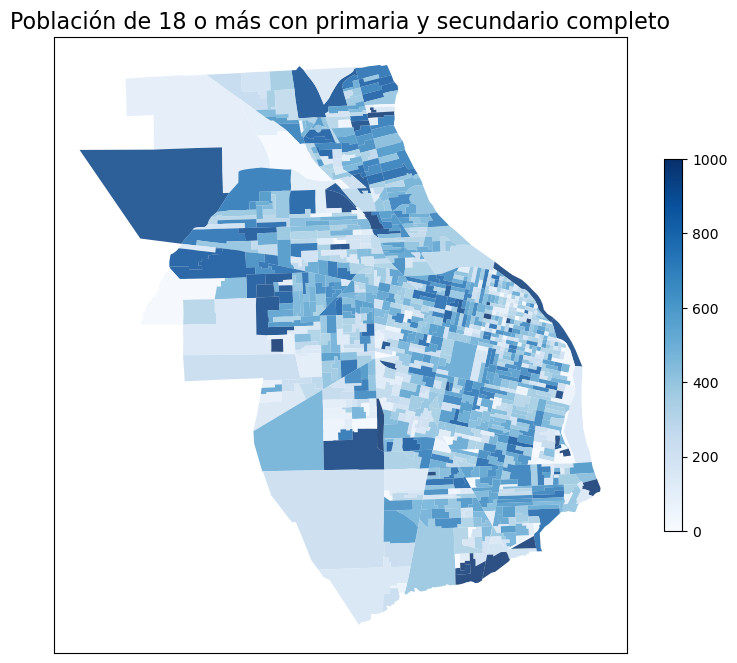

In [1010]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar los datos con paleta de azules (variable numérica) sin leyenda predeterminada
censales.plot(
    column='PoblaciÃ³n de 18 y mÃ¡s con primaria y secundario completo', 
    ax=ax, 
    legend=False,  # Desactivar la leyenda predeterminada
    cmap='Blues',  # Usamos la paleta 'Blues' para variables numéricas
    alpha=0.85
)

# Añadir la barra de colores (leyenda) en el gráfico de forma vertical
norm = Normalize(vmin=0, vmax=1000)  # Normalización para el rango de 0 a 1000
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm.set_array([])

# Añadir la barra de colores (leyenda) en el gráfico
fig.colorbar(sm, ax=ax, fraction=0.02, pad=0.04)

# Eliminar escritura en ejes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

# Título
ax.set_title('Población de 18 o más con primaria y secundario completo', fontsize=16)

# Mostrar gráfico
plt.show()

### Regresión 

In [1064]:
#Regresión logísitca
# Asegúrate de que las columnas sean numéricas
df_est_dummies['PoblaciÃ³n de 18 y mÃ¡s con primaria y secundario completo'] = pd.to_numeric(df_est_dummies['PoblaciÃ³n de 18 y mÃ¡s con primaria y secundario completo'])
df_est_dummies['VOTO_LIBERTARIOS'] = df_est_dummies['VOTO_LIBERTARIOS'].astype(bool)

x = df_est_dummies['PoblaciÃ³n de 18 y mÃ¡s con primaria y secundario completo']
y = df_est_dummies['VOTO_LIBERTARIOS']

# Elimina las filas con valores faltantes en X o y
df_est_dummies = df_est_dummies.dropna(subset=['PoblaciÃ³n de 18 y mÃ¡s con primaria y secundario completo', 'VOTO_LIBERTARIOS'])

# Agrega una constante a X (necesario para el modelo logístico)
x = sm.add_constant(x)
x['PoblaciÃ³n de 18 y mÃ¡s con primaria y secundario completo'] = pd.to_numeric(x['PoblaciÃ³n de 18 y mÃ¡s con primaria y secundario completo'])

# Ajusta el modelo de regresión logística
model = sm.Logit(y, x)
result = model.fit()

# Imprime el resumen del modelo
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.421199
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       VOTO_LIBERTARIOS   No. Observations:                  308
Model:                          Logit   Df Residuals:                      306
Method:                           MLE   Df Model:                            1
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:               0.0009069
Time:                        17:35:45   Log-Likelihood:                -129.73
converged:                       True   LL-Null:                       -129.85
Covariance Type:            nonrobust   LLR p-value:                    0.6275
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const       

### Resultados:

- Pseudo R2: indica que el 2,6% de la variación de la variable dependiente (Intención de voto a LLA) se explica por la variable independiente (Población de 18 años y más con primaria y secundario completo). Es una relación muy débil, por lo que existen otros factores que influyen en la VD.
- Coeficiente de Población de 18 años y más con primaria y secundario completo: indica que por cada unidad que aumenta, la Intención de voto a LLA **disminuye** 0,0044. Esto sugiere que un mayor nivel socioeconómico está asociado con una menor intención de voto a LLA.
- Constante de Población de 18 años y más con primaria y secundario completo: cuando este es 0, la Intención de voto a LLA es 2,2331.
- Siginificatividad del Población de 18 años y más con primaria y secundario completo: 0. Al ser menor a 0.05, indica que la relación es estadísticamente significativa. Por lo que se puede decir que existe una alta probabilidad de que el efecto de la VI sobre la VD sea real y no se deba al azar, rechazando la hipótesis nula de que las variables no tienen relación.

### 3. Segmentos Socioeconómicos

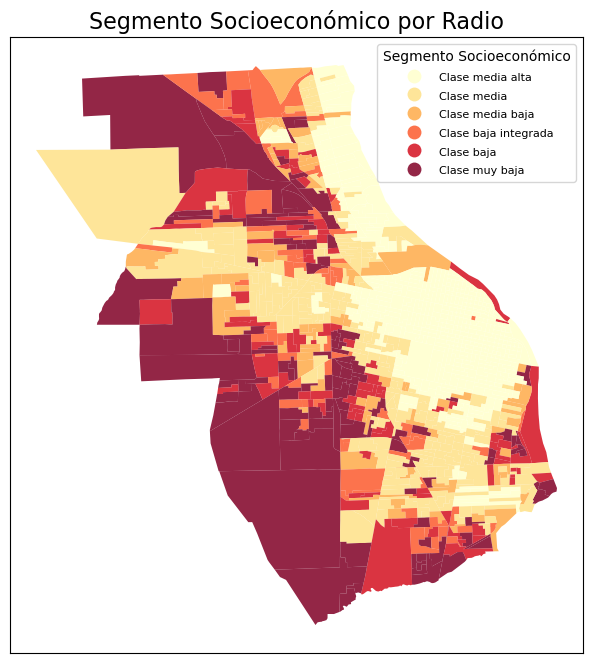

In [1006]:
# 7 es Clase muy baja, 6 Clase baja , 5	Clase baja integrada, 4 Clase media baja,3 Clase media, 2 Clase media alta	

fig, ax = plt.subplots(figsize=(12, 8))


censales.plot(
    column='Segmento socioeconÃ³mico del radio', 
    ax=ax, 
    legend=True, 
    cmap='YlOrRd',  # Usamos una paleta ordinal
    alpha=0.85
)

# leyenda
legend = ax.get_legend()
legend_labels = [
    "Clase media alta",
    "Clase media",
    "Clase media baja",
    "Clase baja integrada",
    "Clase baja",
    "Clase muy baja"
]


for text, label in zip(legend.get_texts(), legend_labels):
    text.set_text(label)

legend.set_title("Segmento Socioeconómico", prop={'size': 10})  # Título más pequeño
for label in legend.get_texts():
    label.set_fontsize(8) 



ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

# Título
ax.set_title('Segmento Socioeconómico por Radio', fontsize=16)

# Mostrar gráfico
plt.show()

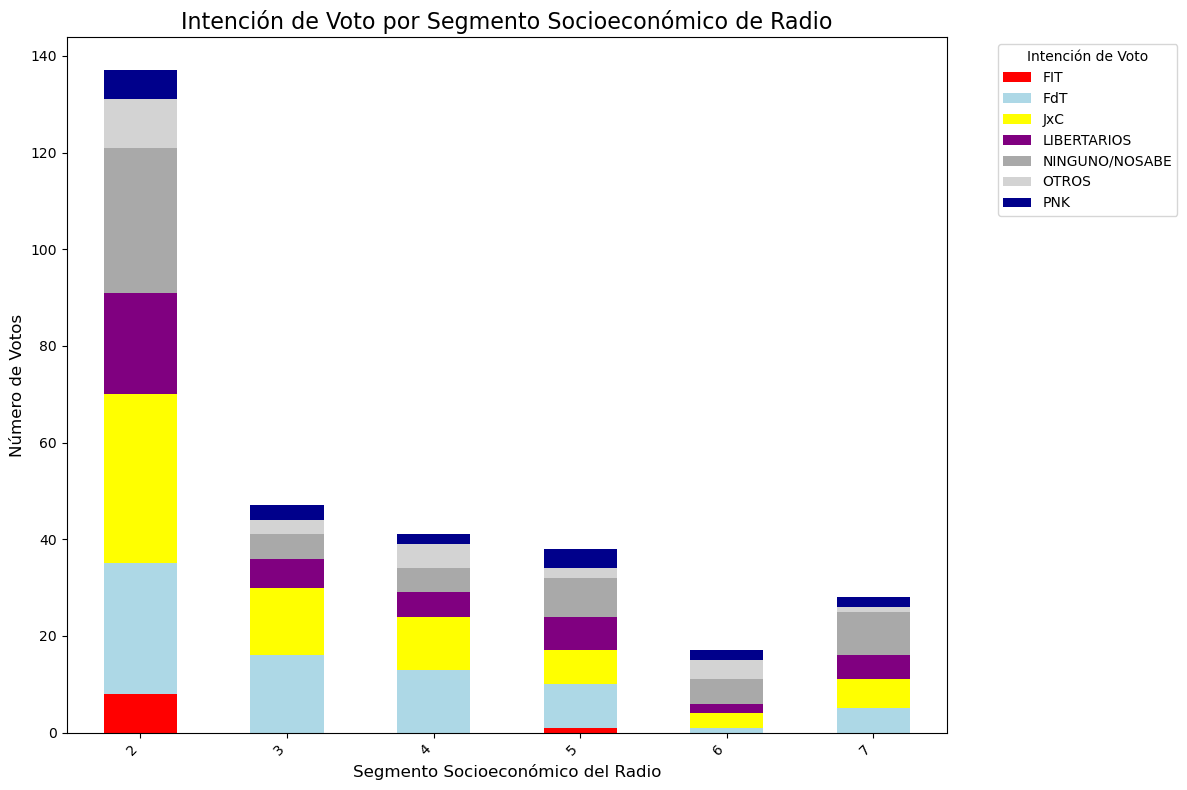

In [1008]:
#GRAFICO OPCIONAL
# Definir la paleta de colores
paleta = {
    "FIT": "red",             
    "FdT": "lightblue",       
    "JxC": "yellow",          
    "LIBERTARIOS": "purple",  
    "NINGUNO/NOSABE": "darkgray",  
    "OTROS": "lightgray",     
    "PNK": "darkblue"         
}

# Agrupar por 'Segmento socioeconÃ³mico del radio' y 'INT DE VOTO X ESPACIO'
df_grouped = df_est.groupby(['Segmento socioeconÃ³mico del radio', 'INT DE VOTO X ESPACIO']).size().unstack(fill_value=0)

# Crear gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar las barras apiladas, por segmento socioeconómico
# Usamos la paleta personalizada con el método 'apply' para asignar los colores
df_grouped.plot(kind='bar', stacked=True, ax=ax, cmap=plt.cm.colors.ListedColormap(list(paleta.values())), figsize=(12, 8))

# Añadir título y etiquetas
ax.set_title('Intención de Voto por Segmento Socioeconómico de Radio', fontsize=16)
ax.set_xlabel('Segmento Socioeconómico del Radio', fontsize=12)
ax.set_ylabel('Número de Votos', fontsize=12)

# Mejorar la leyenda
ax.legend(title="Intención de Voto", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Mejorar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Regresión 

In [1058]:
#Regresión logísitca
# Asegúrate de que las columnas sean numéricas
df_est_dummies['Segmento socioeconÃ³mico del radio'] = pd.to_numeric(df_est_dummies['Segmento socioeconÃ³mico del radio'])
df_est_dummies['VOTO_LIBERTARIOS'] = df_est_dummies['VOTO_LIBERTARIOS'].astype(bool)

x = df_est_dummies['Segmento socioeconÃ³mico del radio']
y = df_est_dummies['VOTO_LIBERTARIOS']

In [1060]:
# Elimina las filas con valores faltantes en X o y
df_est_dummies = df_est_dummies.dropna(subset=['Segmento socioeconÃ³mico del radio', 'VOTO_LIBERTARIOS'])

# Agrega una constante a X (necesario para el modelo logístico)
x = sm.add_constant(x)
x['Segmento socioeconÃ³mico del radio'] = pd.to_numeric(x['Segmento socioeconÃ³mico del radio'])

# Ajusta el modelo de regresión logística
model = sm.Logit(y, x)
result = model.fit()

# Imprime el resumen del modelo
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.421479
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       VOTO_LIBERTARIOS   No. Observations:                  308
Model:                          Logit   Df Residuals:                      306
Method:                           MLE   Df Model:                            1
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:               0.0002430
Time:                        17:30:23   Log-Likelihood:                -129.82
converged:                       True   LL-Null:                       -129.85
Covariance Type:            nonrobust   LLR p-value:                    0.8017
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.8227      0.368    

### Resultados:

- Pseudo R2: un valor tan cercano a cero indica que el modelo no explica bien la variabilidad de la variable dependiente (voto a LLA).
- Coeficiente de Segmento socioeconómico del radio: indica que por cada unidad que aumenta, la Intención de voto a LLA **aumenta** 0,0238. Esto sugiere que un mayor nivel socioeconómico está asociado con una mayor intención de voto a LLA.
- Constante de Segmento socioeconómico del radio: cuando este es 0, la Intención de voto a LLA es -1,8227.
- Siginificatividad del Segmento socioeconómico del radio: 0,801. Al ser el p-valor mayor a 0,05, indica que la relación no es estadísticamente significativa. No hay evidencia suficiente para rechazar la hipótesis nula, lo que sugiere que el modelo no tiene un buen poder explicativo para predecir el voto a LLA.

### 3. Resultados Electorales Elecciones 2019

In [994]:
resultados = gpd.read_file("C:\\Users\\palom\\Downloads\\resultados_2019.csv")
#resultados.columns

In [996]:
# Eliminar filas con valores nulos en las columnas específicas
resultados = resultados.dropna(subset=['FÃ³rmula con mÃ¡s votos'])
resultados = resultados.dropna(subset=['GeometrÃ­a en GeoJSON'])

In [998]:
# Convertir el DataFrame a un GeoDataFrame, estableciendo la columna de geometría
from shapely.geometry import shape
import json
resultados['GeometrÃ­a en GeoJSON'] = resultados['GeometrÃ­a en GeoJSON'].apply(lambda x: shape(json.loads(x)))
resultados = gpd.GeoDataFrame(resultados, geometry='GeometrÃ­a en GeoJSON')
print(type(resultados))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [1000]:
resultados.set_crs(epsg=4326, inplace=True)
print(gdf.crs)

EPSG:4326


In [1002]:
df_ele = gpd.sjoin(gdf, resultados, how="inner", predicate="within")

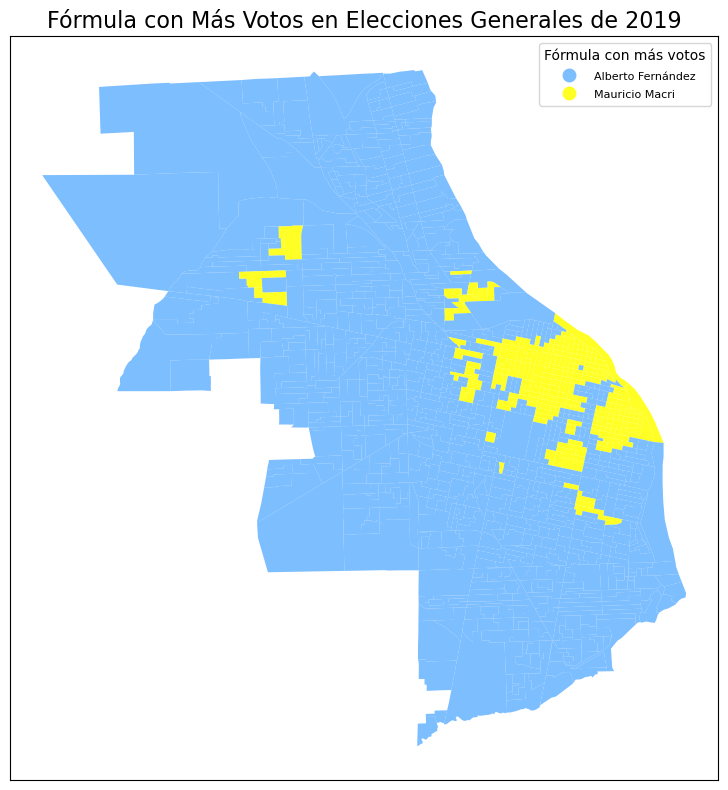

In [1004]:
from matplotlib.colors import ListedColormap

# Crear un diccionario de colores
colores = {
    "Alberto Fernández": "#66B3FF",
    "Mauricio Macri": "yellow"
}

# Crear la paleta categórica
paleta = ListedColormap([colores["Alberto Fernández"], colores["Mauricio Macri"]])

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar los datos con la paleta categórica personalizada
resultados.plot(
    column="FÃ³rmula con mÃ¡s votos",  # Nombre exacto de la columna
    ax=ax,
    legend=True,  # Mostrar la leyenda
    cmap=paleta,  # Paleta personalizada
    alpha=0.85  # Transparencia para las áreas
)

# Ajustar la leyenda
legend = ax.get_legend()
legend_labels = [
    "Alberto Fernández",
    "Mauricio Macri",
]

for text, label in zip(legend.get_texts(), legend_labels):
    text.set_text(label)

legend.set_title("Fórmula con más votos", prop={'size': 10})  # Título más pequeño
for label in legend.get_texts():
    label.set_fontsize(8)

# Eliminar etiquetas de los ejes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

# Título
ax.set_title('Fórmula con Más Votos en Elecciones Generales de 2019', fontsize=16)

# Mostrar gráfico
plt.tight_layout()
plt.show()